<font size="6.2">Summary</font>  

CrewAI is designed around the idea of collaborative, role-based AI agents — hence the name "Crew," highlighting teamwork. Each agent is assigned a specific role, enabling them to work together to solve complex tasks. Unlike single-agent frameworks, CrewAI supports inter-agent communication and dynamic task delegation, allowing tasks to be intelligently split and shared.
In this notebook, we demonstrated how to use CrewAI agents both with and without a manager, integrated web search capabilities using LangChain and SerpAPI, and generated personalized messages based on the gathered information.

Python functions and data files needed to run this notebook are available via this [link](https://github.com/MehdiRezvandehy/LangChain-in-Action-LLM-Applications-with-RAG-and-Agents.git).

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Core classes from the CrewAI framework used to build agent workflows
from crewai import Agent, Task, Crew, Process
import codecs
import os

# Utility tools provided by the separate 'crewai_tools' package
from crewai_tools import (
    ScrapeWebsiteTool,  # Extracts raw information from a given website
    FileWriterTool,     # Writes retrieved data to a file
    TXTSearchTool       # Searches for specific content within a text file
)

import requests
import os
from langchain_openai import ChatOpenAI

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CrewAI" data-toc-modified-id="CrewAI-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CrewAI</a></span></li><li><span><a href="#Agents-with-CrewAI" data-toc-modified-id="Agents-with-CrewAI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Agents with CrewAI</a></span><ul class="toc-item"><li><span><a href="#Create-Agent-and-Task-without-Assigned-Manager" data-toc-modified-id="Create-Agent-and-Task-without-Assigned-Manager-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create Agent and Task without Assigned Manager</a></span></li><li><span><a href="#Create-Agent-and-Task-with-Assigned-Manager" data-toc-modified-id="Create-Agent-and-Task-with-Assigned-Manager-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create Agent and Task with Assigned Manager</a></span></li></ul></li><li><span><a href="#LangChain-Web-Search-+-CrewAI" data-toc-modified-id="LangChain-Web-Search-+-CrewAI-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LangChain Web Search + CrewAI</a></span><ul class="toc-item"><li><span><a href="#Leverage-ChatGPT-as-LLM-in-CrewAI" data-toc-modified-id="Leverage-ChatGPT-as-LLM-in-CrewAI-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Leverage ChatGPT as LLM in CrewAI</a></span></li></ul></li><li><span><a href="#Creating-a-Search-Agent-using-a-Custom-Tool" data-toc-modified-id="Creating-a-Search-Agent-using-a-Custom-Tool-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating a Search Agent using a Custom Tool</a></span><ul class="toc-item"><li><span><a href="#Automate-Email-Creation" data-toc-modified-id="Automate-Email-Creation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Automate Email Creation</a></span></li></ul></li><li><span><a href="#Agentic-Workflow-to-track-Canadian-Bank-Competitors" data-toc-modified-id="Agentic-Workflow-to-track-Canadian-Bank-Competitors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Agentic Workflow to track Canadian Bank Competitors</a></span><ul class="toc-item"><li><span><a href="#Agents" data-toc-modified-id="Agents-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Agents</a></span></li><li><span><a href="#Tasks" data-toc-modified-id="Tasks-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tasks</a></span></li></ul></li></ul></div>

# CrewAI

- **CrewAI** is built around the concept of **collaborative, role-based AI agents**—hence the name “Crew,” emphasizing teamwork.
- The core idea is that **multiple agents**, each assigned a **specific role**, can work together like a team to tackle complex tasks.
- Unlike single-agent frameworks, CrewAI enables **inter-agent communication** and **dynamic task delegation**, allowing tasks to be split and passed between agents intelligently.

---

🔑 **Key Features of CrewAI**

- **Role-Based Architecture**:  
  Each agent is assigned a distinct role (e.g., researcher, planner, writer) tailored to the overall task.


- **Multi-Agent Orchestration**:  
  Coordinates the execution of **multiple agents working collaboratively**.

- **Dynamic Task Delegation**:  
  Tasks can be passed between agents based on their role or expertise—no need for one agent to do everything.

- **Hierarchical & Sequential Workflows**:  
  Supports both high-level "manager" agents and low-level "worker" agents in a structured task flow.

See Figure below for visuals CrewAI workflow:

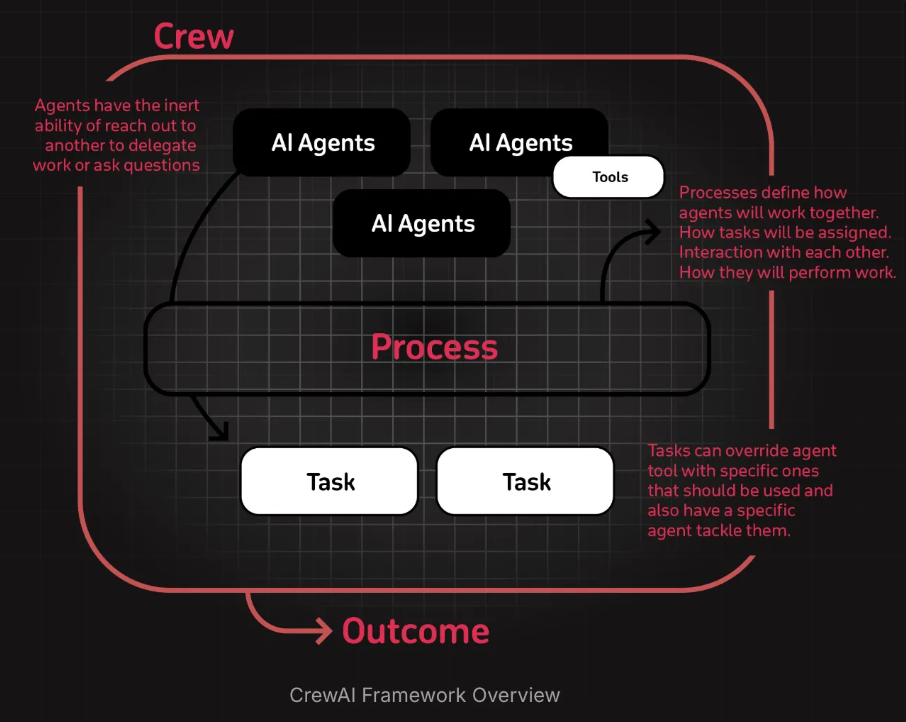
Retrieved image from https://ai.plainenglish.io/mastering-crewai-chapter-1-your-first-intelligent-workflow-06b58aed1b3d

🤝 **CrewAI’s Multi-Agent Approach**

- **Role-Based Design**  
  - Each agent is assigned a **specific responsibility**, such as research, analysis, writing, or summarization.  
  - This mirrors how teams operate in the real world, with each member focusing on their strength.

- **Autonomous Inter-Agent Delegation**  
  - Agents can **dynamically delegate tasks** to one another based on the needs of the workflow.  
  - This enables a more **flexible and scalable** approach to complex tasks.


# Agents with CrewAI 

In [2]:
# Create an instance of the web scraping tool targeting CBC News homepage
cbc_news_scraper = ScrapeWebsiteTool(
    website_url='https://www.cbc.ca/news'
)

# Run the scraper to extract the raw textual content from the webpage
cbc_news_content = cbc_news_scraper.run()

# Display the first 100 characters of the scraped content as a preview
print(cbc_news_content[:100])


Using Tool: Read website content

CBC News - Latest Canada, World, Entertainment and Business News
Content Skip to Main Content Acces


In [3]:
# Initialize the tool
file_writer_tool = FileWriterTool()

# Write content to a file in a specified directory
result = file_writer_tool.run(
    filename='cbc_news.txt',
    content=cbc_news_content,
    directory='./output',
    overwrite='true'  
)

print(result)

Using Tool: File Writer Tool
Content successfully written to ./output\cbc_news.txt


In [4]:
txt = '../output/cbc_news.txt'

# Open the original file with the correct source encoding
with codecs.open(txt, 'r', encoding='cp1252') as source_file:
    content = source_file.read()

# Write the content to the file with UTF-8 encoding
with codecs.open(txt, 'w', encoding='utf-8') as target_file:
    target_file.write(content)

In [5]:
# OpenAI key
os.environ['OPENAI_API_KEY'] = 'sk-.........'

# Set up the document search utility using a specific text file for content-based queries
# Utilizes open source ChromaDB to split and vectorize the file data
news_search_engine = TXTSearchTool(txt=txt)

D:\Learning\MyWebsite\FinalGithub\ToPublihsed\projects\Agentic_Workflow\agentic_workflow\Lib\site-packages\chromadb\types.py:144: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  return self.model_fields  # pydantic 2.x
Inserting batches in chromadb: 100%|█████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]


## Create Agent and Task without Assigned Manager

In [6]:
# Define a news_interpreter agent
news_interpreter = Agent(
    role='News Interpreter',  # Role of the agent
    goal='Analyze the provided news content and answer the related question.',  # Agent's objective
    backstory='You are skilled at interpreting news events, and offering opinions on the significance of the news.',  
    verbose=True,
    allow_delegation=False,  # This agent handles tasks independently and does not delegate
    tools=[news_search_engine]
)

# Define a summarize_news task
summarize_news_task = Task(
    description="Grasp the main idea of news events, summarize them, and share your perspective on their importance.",
    agent=news_interpreter,  # Assigning the task to our agent
    expected_output='Provide a concise response in bullet points.'
)

In [7]:
# Create the crew with a sequential process
news_summary_crew = Crew(
    tasks=[summarize_news_task],
    process=Process.sequential  # Task execution follows a linear, step-by-step order
)

# Run the workflow
output_news = news_summary_crew.kickoff()

# Agent: News Interpreter
## Task: Grasp the main idea of news events, summarize them, and share your perspective on their importance.


D:\Learning\MyWebsite\FinalGithub\ToPublihsed\projects\Agentic_Workflow\agentic_workflow\Lib\site-packages\chromadb\types.py:144: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  return self.model_fields  # pydantic 2.x




# Agent: News Interpreter
## Thought: I need to gather relevant news content to summarize and provide insights on its significance.
## Using tool: Search a txt's content
## Tool Input: 
"{\"search_query\": \"news events\"}"
## Tool Output: 
Relevant Content:
CBC News - Latest Canada, World, Entertainment and Business News

Content Skip to Main Content Accessibility Help Menu When search suggestions are available use up and down arrows to review and enter to select. Search Search Sign In Quick Links Currently Selected: News News Sports Radio Music Listen Live TV Watch news Currently Selected: Top Stories Top Stories Local Climate World Canada Politics Indigenous Business The National Health Entertainment Science CBC News Investigates Go Public About CBC News Being Black in Canada More CBC News - Latest Canada, World, Entertainment and Business News Loaded CBC News - Latest Canada, World, Entertainment and Business News Featured Content Liberal operatives planted 'stop the steal' butto

There are two types of processes in Crew: **sequential** and **hierarchical**:

- **Sequential** is the simpler one—it processes tasks one after another in a fixed order.
- **Hierarchical** involves planning and delegation. Instead of following a set order, it determines the most effective sequence to complete the tasks and assigns them to the appropriate agents.


In [8]:
print(output_news.raw)

- **Liberal operatives planted 'stop the steal' buttons at conservative conference**: Conservatives have accused the Liberals of instilling American-style politics in Canada, igniting heightened political tension.
- **Calls for action on Indigenous issues**: Jagmeet Singh acknowledges that Indigenous matters haven't been prioritized in the campaign, suggesting a gap in political discourse.
- **Carney's appeal for Liberal support**: As he wraps himself in nationalist symbols, Carney's success hinges on garnering backing from the Liberal party, highlighting party dynamics.
- **Criticism towards Poilievre regarding ethics**: New criticisms from Pierre Poilievre regarding Carney's ethics reflect ongoing party rivalries and ethical debates in politics.
- **Job losses in Ingersoll plant**: Hundreds of layoffs are anticipated at the GM plant, raising concerns about community impact and economic stability.
- **Missiles strike Gaza hospital**: Ongoing conflict in Israel intensifies with missile

## Create Agent and Task with Assigned Manager

In [9]:
# Define a new agent with a psychology-focused role
mental_health_advisor = Agent(
    role='Mental Health Advisor',
    goal='Interpret the given context and provide thoughtful responses to psychological questions.',
    backstory=(
        'You are a licensed mental health professional with expertise in psychological methods, '
        'dedicated to helping individuals understand and improve their mental and emotional well-being.'
    ),
    verbose=True,
    allow_delegation=True,
    tools=[]
)

# Define a task for addressing a child’s sleep issues
child_sleep_support_task = Task(
    description="How can I support my son who has a sleep disorder?",
    expected_output='Provide trustworthy and actionable advice in summarized 3-5 bullets.'
)

In [10]:
# Define a translator agent
translator = Agent(
    role='Translator',  # Role of the agent
    goal='Review the provided psychological text and translate it according to the specified question.',  # Agent's objective
    backstory='You are a skilled translator specializing in psychology, capable of translating English \
    psychological content into French, Spanish, and Farsi.',
    verbose=True,
    allow_delegation=True,  # This agent handles tasks independently and does delegate
)

# Define a translate_summarize task
translate_summarize_task = Task(
    description="Understand the main idea and translate it into Farsi as a summarized version in 3–4 bullet points.",
    expected_output='Provide a concise response into Farsi language in 3-4 bullet points.'
)

In [11]:
# Initialize the crew with tasks and agents, letting the manager decide the workflow
support_crew = Crew(
    tasks=[child_sleep_support_task, translate_summarize_task],
    agents=[mental_health_advisor, translator],
    process=Process.hierarchical,  # Allow the manager to determine task priority and delegation
    manager_llm=ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.2), # Manager decide which task should be assign to which agent
    verbose=True
)

crew_result = support_crew.kickoff()


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: a70ebb8e-4c71-4b37-9700-4aed94269a68                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: How can I support my son who has a sleep disorder?


🤖 Agent: Crew Manager
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Crew Manager
    Status: In Progress

🤖 Agent: Crew Manager
    Status: In Progress

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Mental Health Advisor
            Status: In Progress

# Agent: Mental Health Advisor
## Task: Research effective ways to support a child with a sleep disorder


# Agent: Mental Health Advisor
## Final Answer: 
Supporting a child with a sleep disorder involves a variety of strategies tailored to the specific nature of the disorder, the child's age, and individual circumstances. Here are some effective ways to support a child facing sleep challenges:

1. **Create a Consistent Sleep Routine**: Establishing a regular bedtime and wake-up time can help regulate the child's internal clock. Aim for a calming pre-sleep routine that includes quiet activities like reading or taking a warm bath to signal that it's time to wind down.

2. **Enhance Sleep Environment**: Ensure the child’s bedroom is conducive to sleep. This may involve controlling room temperature, minimizing noise, and using blackout curtains to block light. A comfortable mattress and bedding can also make a significant difference.

3. **Limit Screen Time**: Encourage the child to limi

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Mental Health Advisor
            Status: ✅ Completed



# Agent: Crew Manager
## Thought: I need to gather information about how to support a son with a sleep disorder to provide trustworthy and actionable advice in summarized 3-5 bullets.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Research effective ways to support a child with a sleep disorder\", \"context\": \"I need reliable information on how to help a child with a sleep disorder\", \"coworker\": \"Mental Health Advisor\"}"
## Tool Output: 
Supporting a child with a sleep disorder involves a variety of strategies tailored to the specific nature of the disorder, the child's age, and individual circumstances. Here are some effective ways to support a child facing sleep challenges:

1. **Create a Consistent Sleep Routine**: Establishing a regular bedtime and wake-up time can help regulate the child's internal clock. Aim for a calming pre-sleep routine that includes quiet activities like reading or taking a warm bath to signal that it's time to wind down.

2. 

🤖 Agent: Mental Health Advisor
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Mental Health Advisor
    Status: ✅ Completed



# Agent: Crew Manager
## Final Answer: 
Supporting a child with a sleep disorder involves a variety of strategies tailored to the specific nature of the disorder, the child's age, and individual circumstances. Here are some effective ways to support a child facing sleep challenges:

1. **Create a Consistent Sleep Routine**: Establishing a regular bedtime and wake-up time can help regulate the child's internal clock. Aim for a calming pre-sleep routine that includes quiet activities like reading or taking a warm bath to signal that it's time to wind down.

2. **Enhance Sleep Environment**: Ensure the child’s bedroom is conducive to sleep. This may involve controlling room temperature, minimizing noise, and using blackout curtains to block light. A comfortable mattress and bedding can also make a significant difference.

3. **Limit Screen Time**: Encourage the child to limit exposure to screens (phones, tablets, TV) at least an hour before bedtime. The blue light emitted by screens can

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
       Assigned to: Crew Manager
       Status: ✅ Completed
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: e970e6b5-a38a-421c-9136-97c678b244f5                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Understand the main idea and translate it into Farsi as a summarized version in 3–4 bullet points.


🤖 Agent: Crew Manager
    Status: In Progress

🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Translator
            Status: In Progress

# Agent: Translator
## Task: Translate the main idea into Farsi in a summarized version in 3-4 bullet points


# Agent: Translator
## Final Answer: 
- حمایت از کودکانی که اختلال خواب دارند شامل استراتژی‌های متنوعی است.
- این استراتژی‌ها باید بر اساس نوع خاص اختلال و شرایط کودک تنظیم شوند.
- توجه به نیازهای خاص هر کودک در فرآیند مدیریت اختلال خواب بسیار مهم است.
- همکاری با حرفه‌ای‌ها و متخصصان نیز می‌تواند به بهبود وضعیت خواب کمک کند.




🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Translator
            Status: ✅ Completed



# Agent: Crew Manager
## Thought: I need to ensure that the main idea is accurately translated into Farsi in a summarized version while maintaining the key points and context provided. It's crucial to delegate the translation task to the Translator and ask any necessary questions to ensure a clear understanding of the content.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Translate the main idea into Farsi in a summarized version in 3-4 bullet points\", \"context\": \"Supporting a child with a sleep disorder involves various strategies tailored to the specific nature of the disorder and the child's circumstances.\", \"coworker\": \"Translator\"}"
## Tool Output: 
- حمایت از کودکانی که اختلال خواب دارند شامل استراتژی‌های متنوعی است.
- این استراتژی‌ها باید بر اساس نوع خاص اختلال و شرایط کودک تنظیم شوند.
- توجه به نیازهای خاص هر کودک در فرآیند مدیریت اختلال خواب بسیار مهم است.
- همکاری با حرفه‌ای‌ها و متخصصان نیز می‌تواند به بهبود وضعیت خواب کمک کند.


🤖 Agent: Translator
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Translator
    Status: ✅ Completed



# Agent: Crew Manager
## Final Answer: 
- حمایت از کودکانی که اختلال خواب دارند شامل استراتژی‌های متنوعی است.
- این استراتژی‌ها باید بر اساس نوع خاص اختلال و شرایط کودک تنظیم شوند.
- توجه به نیازهای خاص هر کودک در فرآیند مدیریت اختلال خواب بسیار مهم است.
- همکاری با حرفه‌ای‌ها و متخصصان نیز می‌تواند به بهبود وضعیت خواب کمک کند.




🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: e970e6b5-a38a-421c-9136-97c678b244f5
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 89a8d202-b95b-4844-a2d5-abf43b260825
       Assigned to: Crew Manager
       Status: ✅ Completed
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 89a8d202-b95b-4844-a2d5-abf43b260825                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: a70ebb8e-4c71-4b37-9700-4aed94269a68                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [12]:
for output in crew_result.tasks_output:
    print('\n\n')
    print(output)
    print('\n')
    print('----')




Supporting a child with a sleep disorder involves a variety of strategies tailored to the specific nature of the disorder, the child's age, and individual circumstances. Here are some effective ways to support a child facing sleep challenges:

1. **Create a Consistent Sleep Routine**: Establishing a regular bedtime and wake-up time can help regulate the child's internal clock. Aim for a calming pre-sleep routine that includes quiet activities like reading or taking a warm bath to signal that it's time to wind down.

2. **Enhance Sleep Environment**: Ensure the child’s bedroom is conducive to sleep. This may involve controlling room temperature, minimizing noise, and using blackout curtains to block light. A comfortable mattress and bedding can also make a significant difference.

3. **Limit Screen Time**: Encourage the child to limit exposure to screens (phones, tablets, TV) at least an hour before bedtime. The blue light emitted by screens can interfere with the production of melat

In [13]:
print(crew_result.raw)

- حمایت از کودکانی که اختلال خواب دارند شامل استراتژی‌های متنوعی است.
- این استراتژی‌ها باید بر اساس نوع خاص اختلال و شرایط کودک تنظیم شوند.
- توجه به نیازهای خاص هر کودک در فرآیند مدیریت اختلال خواب بسیار مهم است.
- همکاری با حرفه‌ای‌ها و متخصصان نیز می‌تواند به بهبود وضعیت خواب کمک کند.


# LangChain Web Search + CrewAI

`DuckDuckGoSearchRun` from `langchain_community.tools` is a **tool wrapper** that allows you to **perform real-time web search** using **DuckDuckGo** inside a LangChain agent or application.

Here's what it basically does:
- It **sends a query** to the DuckDuckGo search engine (which is privacy-focused, no tracking).
- It **gets the search results** (summaries, links, etc.).
- It **returns a text output** that your agent or app can use — like answering questions, enriching a conversation, pulling facts, etc.

So if you are building a chatbot, an assistant, or anything that **needs live web search**, `DuckDuckGoSearchRun` lets your LangChain app *search the internet* using DuckDuckGo.


**Example usage:**

```python
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()
result = search.run("Tell me where Bandar-e-Anzali is, what is special about it.")
```

This would search DuckDuckGo and return a short answer or links about who won the 2024 UEFA Champions League.

In [14]:
# Initialize the tool
from langchain_community.tools import DuckDuckGoSearchRun  

In [15]:
search_tool = DuckDuckGoSearchRun()
query = 'Tell me where Bandar-e-Anzali is, what is special about it?'
search_tool.run(query)

'The Anzali Aquarium in Bandar Anzali is a highly captivating attraction that boasts a collection of over 40 diverse aquatic species. Known as the Fantastic Aquarium, it is recognized as one of the largest and most comprehensive recreational and tourist complexes in the country, making it a top sightseeing destination in Bandar Anzali. شهر بندرانزلی، یکی از زیباترین و مهم\u200cترین شهرهای شمالی ایران، در استان گیلان واقع شده است.این شهر با موقعیت جغرافیایی خاص خود در کنار دریای خزر و تالاب انزلی، به عنوان یکی از مقاصد گردشگری محبوب شناخته می\u200cشود. سفر به بندر انزلی تجربه\u200cای عالی برای شما خواهد بود؛ به شرط این که تفریحات و دیدنی\u200cهای این شهر را بشناسید. این مقاله با معرفی جاذبه\u200cهای گردشگری و تفریحی بندر انزلی در این سفر همراه شما خواهد بود. از جمله مناطق گردشگری نزدیک به منطقه آزاد: بلوار ساحلی: پیاده\u200cروی در امتداد این بلوار زیبا، تماشای منظره\u200c بی\u200cنظیر دریا و لذت بردن از نسیم خنک، طعمی دلچسب از سفر به انزلی را به شما می\u200cدهد.; مجتمع ساحلی انزلی: این 

If you want to integrate a tool in a crew, you ll have to a little of extra work

In [16]:
#pip install crewai-tools

In [17]:
# Import the 'tool' decorator from crewai
from crewai.tools import tool

# Define a new tool for CrewAI using the @tool decorator
# This decorator marks the function so CrewAI can recognize and use it as a tool
@tool('DuckDuckGoSearch')
def web_search(query: str):
    """
    Perform a web search for the given query using DuckDuckGo.

    Args:
        query (str): The search term or question.

    Returns:
        str: The search result returned by DuckDuckGoSearchRun tool.
    """
    return search_tool.run(query)  # Calls the search tool to perform the web search

In [18]:
senior_data_scientist = Agent(
    role='Principal Data Scientist',
    goal='Solve complex, high-impact problems in the field of data science, particularly within the \
    financial technology sector.',
    backstory="""
You are a highly experienced Principal Data Scientist with a proven track record of addressing intricate 
challenges in the financial technology industry. 
You excel in designing innovative machine learning solutions, optimizing data-driven decision systems, 
and providing strategic insights to support business objectives.
Your expertise spans predictive modeling, deep learning, and scalable data architecture.
""",
    verbose=True,
    allow_delegation=False,
    tools=[web_search]
)

author = Agent(
    role='Technical Content Writer',
    goal='Produce clear, well-structured, and insightful documentation on complex technical \
    topics for a broad range of audiences.',
    backstory="""
You are an accomplished technical writer with numerous scholarly publications from prestigious universities. 
Your background combines deep technical expertise with the ability to communicate sophisticated concepts 
in an accessible, engaging manner.
You specialize in creating content that bridges the gap between technical experts and business stakeholders, 
ensuring clarity, precision, and impact.
""",
    verbose=True,
    allow_delegation=True
)


In [19]:
# Tasks for agents
task_1 = Task(
  description="""Perform an in-depth analysis of the latest 2025 advancements in AI focused on agentic workflows, 
  highlighting major trends, breakthrough innovations, and their potential impacts across industries.""",
  expected_output="Complete analysis presented in bullet-point format.",
  agent=senior_data_scientist
)

task_2 = Task(
  description="""Using the information provided, create an insightful yet approachable blog post that spotlights 
  the most important AI advancements in agentic workflows. Aim for a tone that's smart and forward-thinking but 
  still easy to connect with — no heavy jargon or mechanical writing.""",
  expected_output="Write a complete blog post consisting of at least 3-4 paragraphs.",
  agent=author
)

In [20]:
# Set up your crew to work through tasks one after another
crew = Crew(
    agents=[senior_data_scientist, author],
    tasks=[task_1, task_2],
    process=Process.sequential,
)

In [21]:
# writes tries to delegate to research analyst. WRONG!
result = crew.kickoff()

# Agent: Principal Data Scientist
## Task: Perform an in-depth analysis of the latest 2025 advancements in AI focused on agentic workflows, 
  highlighting major trends, breakthrough innovations, and their potential impacts across industries.


# Agent: Principal Data Scientist
## Thought: I need to gather information on the latest advancements in AI focused on agentic workflows for the year 2025, including trends, breakthrough innovations, and potential impacts across industries.
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"2025 advancements in AI agentic workflows trends innovations impact\"}"
## Tool Output: 
In 2025, the AI landscape will be defined by scaling AI initiatives from pilot to production, advancements in Agentic AI and autonomous decision-making systems, renewed focus on data quality, governance, and ethical AI adoption, as well as transformative impacts across industries like customer service, software development, and industrial processes. "More and 

# Agent: Principal Data Scientist
## Task: Could you provide insights and key points on the advancements in agentic workflows and specific examples of AI applications across industries?


# Agent: Principal Data Scientist
## Thought: Action: DuckDuckGoSearch
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"advancements in agentic workflows AI applications across industries examples\"}"
## Tool Output: 
One popular agentic AI example in this industry is IBM. Its Watsonx assistant platform helps employees reduce their time spent on common HR tasks by 75%. 16. Procurement Workflow Automation. AI agents can automate and streamline every stage of the procurement process, from request to payment, to guarantee efficiency and policy compliance. Applications of Agentic AI Workflows Across Industries. Agentic AI workflows are transforming how businesses approach problem-solving, customer engagement, and operational efficiency. Below are some examples of how these workflows manifest

# Agent: Principal Data Scientist
## Task: What specific examples of AI applications in agentic workflows should we highlight in the blog post to demonstrate their impact across industries?


# Agent: Principal Data Scientist
## Thought: Thought: I need to gather specific examples of AI applications in agentic workflows across various industries to provide a comprehensive answer.
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"AI applications in agentic workflows examples healthcare logistics customer service\"}"
## Tool Output: 
Agentic AI is bringing autonomy, adaptability, and real-time decision-making into the core of businesses. AI agents can now autonomously do complicated tasks, learn from data, and continuously improve their performance without human supervision in a variety of settings, including production floors and customer service desks.. This blog will highlight the top 25 agentic AI use cases with some ... Respondents described agentic AI (52%) and multiag

In [22]:
print(result)

### The Rise of Agentic Workflows: Transforming Industries with AI

The evolution of agentic workflows in artificial intelligence (AI) marks a significant leap in how various sectors utilize technology to enhance productivity and decision-making. These systems, capable of operating independently and making decisions based on data, are fundamentally reshaping the landscape across industries. Here, we explore key advancements and their transformative impact.

One prominent area is **healthcare**. Agentic AI systems are revolutionizing patient care with adaptive diagnostics and treatment plans. For instance, AI can analyze complex medical images and assist healthcare professionals in identifying anomalies that could otherwise go unnoticed. Furthermore, predictive analytics powered by AI can forecast patient outcomes by examining historical data, enabling timely interventions and tailored treatment strategies that significantly improve health results.

In **logistics**, AI has automated nu

In [23]:
# Now next turning off delegation and see the difference
author.allow_delegation = False  # turn off delegation, resulting in all hard-coded delegation

In [24]:
# Set up your crew to work through tasks one after another
crew = Crew(
    agents=[senior_data_scientist, author],
    tasks=[task_1, task_2],
    process=Process.sequential,
)
result = crew.kickoff()

# Agent: Principal Data Scientist
## Task: Perform an in-depth analysis of the latest 2025 advancements in AI focused on agentic workflows, 
  highlighting major trends, breakthrough innovations, and their potential impacts across industries.


# Agent: Principal Data Scientist
## Thought: I need to gather information on the latest advancements in AI focused on agentic workflows, particularly for the year 2025. I'll perform a web search to find relevant details on major trends and breakthrough innovations in this area.
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"2025 advancements in AI agentic workflows trends innovations impacts\"}"
## Tool Output: 
For example, Salesforce's Agentforce is a new layer on its existing platform that enables users to easily build and deploy autonomous AI agents to handle complex tasks across workflows, such as simulating product launches and orchestrating marketing campaigns. 8 Sammy Spiegel, "The future of AI agents: Top predictions an

In [25]:
print(result)

**The Future is Now: How Agentic AI is Reshaping Workflows by 2025**

As we stand at the brink of a new era in artificial intelligence, the concept of Agentic AI is emerging as a game-changer for business workflows. Focusing on autonomous agents that require minimal human guidance, Agentic AI is poised to revolutionize how tasks are performed across various industries. By 2025, we will witness a significant shift in our professional landscapes—characterized by smarter collaboration between humans and AI, scalable systems, and a remarkable leap forward in operational efficiency.

At the heart of Agentic AI lies the need for a cooperative relationship between humans and machines. The principle of human-AI collaboration emphasizes a partnership where AI agents serve as valuable co-workers, assisting in decision-making processes. This synergistic connection allows organizations to harness the strengths of both parties, leading to more informed strategies and increased productivity. Moreove

In [26]:
print(task_1.output.raw)

- **Overview of Agentic AI (2025)**
  - Agentic AI focuses on autonomous agents that perform tasks with minimal human intervention, transforming workflows across various industries.
  
- **Major Trends**
  - **Human-AI Collaboration**: The success of agentic AI hinges on collaboration between humans and AI, where AI agents act as co-workers, assisting in decision-making.
  - **Increased Modularity**: Development of complex AI agents from simpler components allows for more versatile applications in different sectors.
  - **Focus on Scalability**: Leveraging distributed computing resources to enhance the growth of AI systems, making them adaptable to increasing demands.
  - **Interoperability**: Ensuring AI systems can operate across various platforms to provide seamless integration into existing workflows.
  
- **Breakthrough Innovations**
  - **Salesforce Agentforce**: An innovative layer that enables users to build and deploy autonomous AI agents within the Salesforce ecosystem, facil

In [27]:
print(task_2.output.raw)

**The Future is Now: How Agentic AI is Reshaping Workflows by 2025**

As we stand at the brink of a new era in artificial intelligence, the concept of Agentic AI is emerging as a game-changer for business workflows. Focusing on autonomous agents that require minimal human guidance, Agentic AI is poised to revolutionize how tasks are performed across various industries. By 2025, we will witness a significant shift in our professional landscapes—characterized by smarter collaboration between humans and AI, scalable systems, and a remarkable leap forward in operational efficiency.

At the heart of Agentic AI lies the need for a cooperative relationship between humans and machines. The principle of human-AI collaboration emphasizes a partnership where AI agents serve as valuable co-workers, assisting in decision-making processes. This synergistic connection allows organizations to harness the strengths of both parties, leading to more informed strategies and increased productivity. Moreove

## Leverage ChatGPT as LLM in CrewAI

In [28]:
# use langhcain chatllm
from langchain_openai import ChatOpenAI

senior_data_scientist = Agent(
    role='Principal Data Scientist',
    goal='Solve complex, high-impact problems in the field of data science, particularly within the \
    financial technology sector.',
    backstory="""
You are a highly experienced Principal Data Scientist with a proven track record of addressing intricate 
challenges in the financial technology industry. 
You excel in designing innovative machine learning solutions, optimizing data-driven decision systems, 
and providing strategic insights to support business objectives.
Your expertise spans predictive modeling, deep learning, and scalable data architecture.
""",
    verbose=True,
    allow_delegation=False,
    tools=[web_search],
    llm=ChatOpenAI(model_name="gpt-4o-mini", temperature=0.2)
)

In [29]:
author = Agent(
    role='Technical Content Writer',
    goal='Produce clear, well-structured, and insightful documentation on complex technical \
    topics for a broad range of audiences.',
    backstory="""
You are an accomplished technical writer with numerous scholarly publications from prestigious universities. 
Your background combines deep technical expertise with the ability to communicate sophisticated concepts 
in an accessible, engaging manner.
You specialize in creating content that bridges the gap between technical experts and business stakeholders, 
ensuring clarity, precision, and impact.
""",
    verbose=True,
    allow_delegation=True
)

In [30]:
# Tasks for agents
task_1 = Task(
  description="""Perform an in-depth analysis of the latest 2025 advancements in AI focused on agentic workflows, 
  highlighting major trends, breakthrough innovations, and their potential impacts across industries.""",
  expected_output="Complete analysis presented in bullet-point format.",
  agent=senior_data_scientist
)

task_2 = Task(
  description="""Using the information provided, create an insightful yet approachable blog post that spotlights 
  the most important AI advancements in agentic workflows. Aim for a tone that's smart and forward-thinking but 
  still easy to connect with — no heavy jargon or mechanical writing.""",
  expected_output="Write a complete blog post consisting of at least 3-4 paragraphs.",
  agent=author
)

In [31]:
# Set up your crew to work through tasks one after another
crew = Crew(
    agents=[senior_data_scientist, author],
    tasks=[task_1, task_2],
    process=Process.sequential,
)

In [32]:
# writes tries to delegate to research analyst. WRONG!
result = crew.kickoff()

# Agent: Principal Data Scientist
## Task: Perform an in-depth analysis of the latest 2025 advancements in AI focused on agentic workflows, 
  highlighting major trends, breakthrough innovations, and their potential impacts across industries.


# Agent: Principal Data Scientist
## Thought: I need to gather information on the latest advancements in AI focused on agentic workflows for the year 2025, including trends, innovations, and impacts across industries.
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"2025 advancements in AI agentic workflows trends innovations impacts\"}"
## Tool Output: 
In 2025, the AI landscape will be defined by scaling AI initiatives from pilot to production, advancements in Agentic AI and autonomous decision-making systems, renewed focus on data quality, governance, and ethical AI adoption, as well as transformative impacts across industries like customer service, software development, and industrial processes. Architectural Principles of Agen

# Agent: Principal Data Scientist
## Task: Create a complete blog post that highlights the most important AI advancements in agentic workflows. The tone should be smart and forward-thinking, while still being approachable. The content must cover the major trends in AI agentic workflows for 2025, including scaling AI initiatives, advancements in agentic AI, data quality and governance, and transformative impacts across industries. Additionally, discuss architectural principles of agentic AI, breakthrough innovations such as Salesforce's Agentforce, potential impacts across customer service, software development, and industrial processes, as well as challenges and considerations such as the pace of change and ROI debates.


# Agent: Principal Data Scientist
## Thought: Action: DuckDuckGoSearch
## Using tool: DuckDuckGoSearch
## Tool Input: 
"{\"query\": \"AI advancements in agentic workflows 2025 trends\"}"
## Tool Output: 
Artificial Intelligence (AI) has undergone significant transform



# Agent: Technical Content Writer
## Final Answer: 
**The Future of AI in Agentic Workflows: Trends for 2025**

As we look toward 2025, the landscape of artificial intelligence (AI) is set to be transformed by advancements in agentic workflows. These autonomous AI agents are not just tools for automation; they are becoming sophisticated entities capable of independent decision-making and action. This evolution is driven by several key trends that promise to reshape industries and redefine how we interact with technology.

One of the most significant trends is the scaling of AI initiatives across organizations. Businesses are increasingly recognizing the need for robust AI strategies that can handle complex workflows and large datasets. Agentic AI systems are at the forefront of this movement, enabling organizations to automate multi-step processes such as data ingestion, validation, and incident detection. This shift allows engineers to manage larger systems with fewer resources, whi

In [33]:
print(result)

**The Future of AI in Agentic Workflows: Trends for 2025**

As we look toward 2025, the landscape of artificial intelligence (AI) is set to be transformed by advancements in agentic workflows. These autonomous AI agents are not just tools for automation; they are becoming sophisticated entities capable of independent decision-making and action. This evolution is driven by several key trends that promise to reshape industries and redefine how we interact with technology.

One of the most significant trends is the scaling of AI initiatives across organizations. Businesses are increasingly recognizing the need for robust AI strategies that can handle complex workflows and large datasets. Agentic AI systems are at the forefront of this movement, enabling organizations to automate multi-step processes such as data ingestion, validation, and incident detection. This shift allows engineers to manage larger systems with fewer resources, while analysts can focus on strategic insights rather tha

In [34]:
print(task_2.output.raw)

**The Future of AI in Agentic Workflows: Trends for 2025**

As we look toward 2025, the landscape of artificial intelligence (AI) is set to be transformed by advancements in agentic workflows. These autonomous AI agents are not just tools for automation; they are becoming sophisticated entities capable of independent decision-making and action. This evolution is driven by several key trends that promise to reshape industries and redefine how we interact with technology.

One of the most significant trends is the scaling of AI initiatives across organizations. Businesses are increasingly recognizing the need for robust AI strategies that can handle complex workflows and large datasets. Agentic AI systems are at the forefront of this movement, enabling organizations to automate multi-step processes such as data ingestion, validation, and incident detection. This shift allows engineers to manage larger systems with fewer resources, while analysts can focus on strategic insights rather tha

# Creating a Search Agent using a Custom Tool

[SerpApi](https://serpapi.com/)'s GoogleSearch API allows users to access real-time search results from Google without the need for web scraping. It provides structured data such as organic results, ads, images, and news, which is ideal for those looking to analyze search trends or build search-based applications. With features like geolocation, language, and device filtering, SerpApi ensures flexibility in retrieving results tailored to specific needs. Additionally, its API eliminates the complexity of bypassing captchas or managing search engine infrastructure.

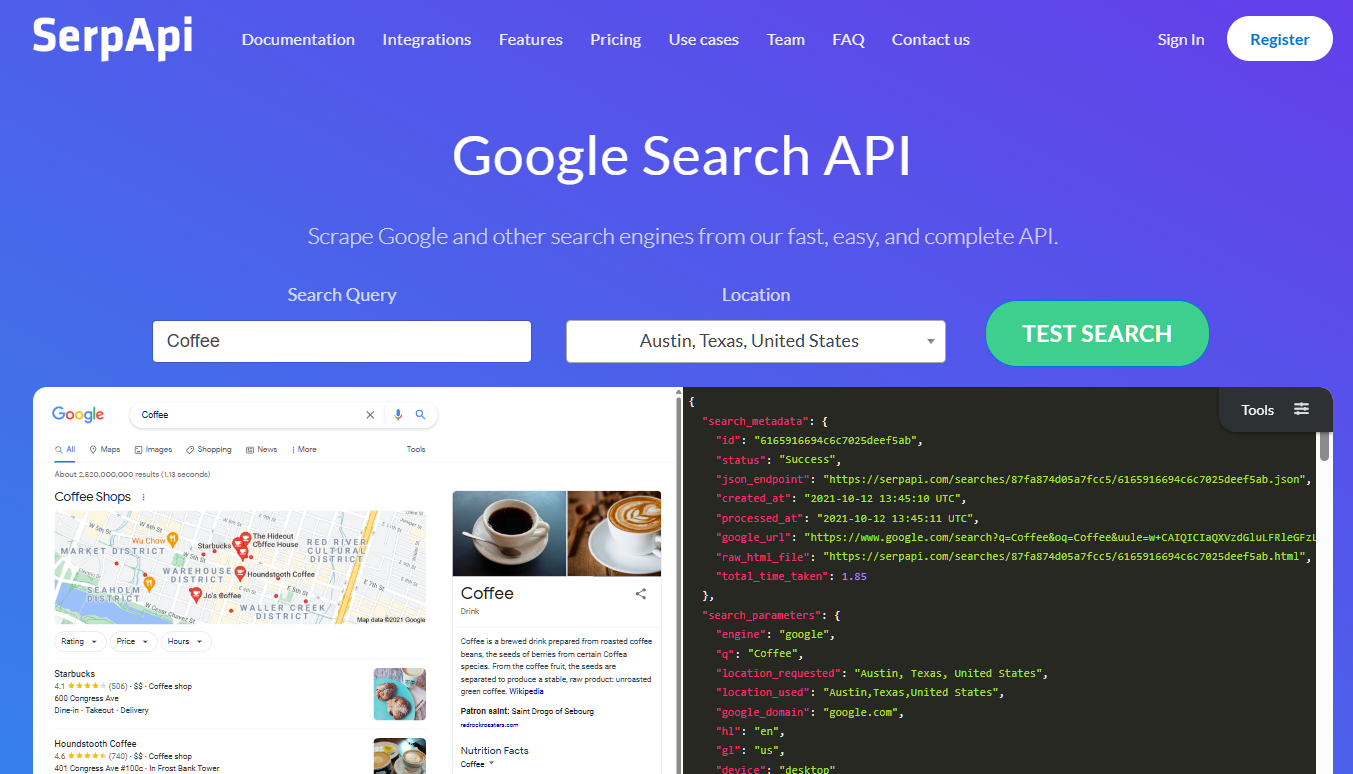

In [35]:
# sign up here https://serper.dev/signup to get your free API key
os.environ["SERP_API_KEY"] = '4f.................'

In [47]:
import json
import os
import requests
from crewai import Agent, Task
from langchain.tools import tool
from serpapi import GoogleSearch
from crewai.tools import BaseTool

class GoogleSearchTool(BaseTool):
    name: str = "Google Search"
    description: str = """Searches the internet for a given topic and returns relevant results."""

    def _run(self, query: str, top_k: int = 3) -> str:
        params = {
            "engine": "google",
            "google_domain": "google.com",
            "gl": "us",
            "hl": "en",
            "q": query,
            "api_key": os.environ["SERP_API_KEY"],
        }

        search = GoogleSearch(params)
        response = search.get_dict()
        
        # Check if organic results are available, exclude sponsored results
        if 'organic_results' not in response:
            return "Sorry, I couldn't find anything on that topic. There may be an issue with your SerpApi key."
        
        results = response['organic_results']
        formatted_results = []
        
        for result in results[:top_k]:
            try:
                formatted_results.append('\n'.join([
                    f"Title: {result['title']}", 
                    f"Link: {result['link']}",
                    f"Snippet: {result['snippet']}", 
                    "\n-----------------"
                ]))
            except KeyError:
                continue

        return '\n'.join(formatted_results)


In [48]:
GoogleSearchTool().description

"Tool Name: Google Search\nTool Arguments: {'query': {'description': None, 'type': 'str'}, 'top_k': {'description': None, 'type': 'int'}}\nTool Description: Searches the internet for a given topic and returns relevant results."

In [51]:
print(GoogleSearchTool().run(query="Who is Mehdi Rezvandehy?"))

Using Tool: Google Search
Title: Mehdi Rezvandehy's Speaker Profile
Link: https://sessionize.com/mehdi-rezvandehy/
Snippet: Mehdi is a Principal Data Scientist at ATB Financial, leveraging machine learning and Generative AI to create cutting-edge solutions in the banking industry ...

-----------------
Title: Mehdi Rezvandehy Ph.D Researcher at University of Alberta
Link: https://www.researchgate.net/profile/Mehdi-Rezvandehy
Snippet: Mehdi REZVANDEHY, Researcher | Cited by 55 | of University of Alberta, Edmonton (UAlberta) | Read 7 publications | Contact Mehdi REZVANDEHY.

-----------------
Title: Mehdi Rezvandehy - Data Scientist at ATB Financial
Link: https://www.zoominfo.com/p/Mehdi-Rezvandehy/2227598116
Snippet: Mehdi Rezvandehy is a Principal Data Scientist at ATB Financial based in Edmonton, Alberta. Previously, Mehdi was a Senior Data Scientist at Symend and also ...

-----------------


## Automate Email Creation

The agent below is designed to find information about a scientist online and craft a personalized email inviting them to serve as a reviewer for a scientific journal.

In [40]:
internet_agent = Agent(
    role='Google User',
    goal='Search for information online and extract relevant data from websites.',
    backstory="""You have a talent for analyzing complex data and turning it into actionable insights.""",
    tools=[
        GoogleSearchTool()
    ],
    verbose=True
)
email_agent = Agent(
    role='Emailer',
    goal='Compose brief, friendly emails to individuals.',
    backstory="""You are a great helper.""",
    tools=[],
    verbose=True
)

lookup_task_google_search = Task(
  description="""Search for Mehdi Rezvandehy""",
  expected_output="A query lookup report.",
  agent=internet_agent
)

emailer_task = Task(
  description="""Write a personalized email to Mehdi Rezvandehy, using online information, 
  inviting him to review a paper for XYZ Journal.""",
  expected_output="A very consie professional email: 3-4 sentences",
  agent=email_agent
)


In [41]:
crew = Crew(
    tasks=[lookup_task_google_search, emailer_task],
    process=Process.sequential,
    verbose=True
)

result = crew.kickoff()

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 904b973d-559c-409c-a585-542afa37a77b                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
       Status: Executing Task...
    └── 🤖 Agent: Google User
            Status: In Progress

# Agent: Google User
## Task: Search for Mehdi Rezvandehy


🤖 Agent: Google User
    Status: In Progress



# Agent: Google User
## Thought: I need to search for information about Mehdi Rezvandehy to gather relevant data for the query lookup report.
## Using tool: Google Search
## Tool Input: 
"{\"query\": \"Mehdi Rezvandehy\", \"top_k\": 10}"
## Tool Output: 
Title: MEHDI REZVANDEHY PH.D. - Home
Link: https://mehdirezvandehy.github.io/
Snippet: Holding a PhD in Geostatistics from the University of Alberta, I bring extensive experience across various industries, including engineering (oil & gas), ...

-----------------
Title: Mehdi Rezvandehy's Speaker Profile
Link: https://sessionize.com/mehdi-rezvandehy/
Snippet: Mehdi is a Principal Data Scientist at ATB Financial, leveraging machine learning and Generative AI to create cutting-edge solutions in the banking industry ...

-----------------
Title: Mehdi Rezvandehy
Link: https://scholar.google.com/citations?user=T1c42fAAAAAJ&hl=en
Snippet: Mehdi Rezvandehy. University of Calgary. Verified email at ucalgary.ca. Data Scientist. ArticlesCited

🤖 Agent: Google User
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Google User
    Status: In Progress



# Agent: Google User
## Final Answer: 
1. **MEHDI REZVANDEHY PH.D. - Home**  
   Link: [https://mehdirezvandehy.github.io/](https://mehdirezvandehy.github.io/)  
   Holding a PhD in Geostatistics from the University of Alberta, I bring extensive experience across various industries, including engineering (oil & gas), ...

2. **Mehdi Rezvandehy's Speaker Profile**  
   Link: [https://sessionize.com/mehdi-rezvandehy/](https://sessionize.com/mehdi-rezvandehy/)  
   Mehdi is a Principal Data Scientist at ATB Financial, leveraging machine learning and Generative AI to create cutting-edge solutions in the banking industry ...

3. **Mehdi Rezvandehy**  
   Link: [https://scholar.google.com/citations?user=T1c42fAAAAAJ&hl=en](https://scholar.google.com/citations?user=T1c42fAAAAAJ&hl=en)  
   Mehdi Rezvandehy. University of Calgary. Verified email at ucalgary.ca. Data Scientist.

4. **Mehdi Rezvandehy Ph.D Researcher at University of Alberta**  
   Link: [https://www.researchgate.net/profile/M

🚀 Crew: crew
└── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
       Status: Executing Task...
    └── 🤖 Agent: Google User
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
       Assigned to: Google User
       Status: ✅ Completed
    └── 🤖 Agent: Google User
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5                                                                     │
│  Agent: Google User                                                                                             │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
│      Assigned to: Google User
│      Status: ✅ Completed
│   └── 🤖 Agent: Google User
│           Status: ✅ Completed
└── 📋 Task: 34aa62e6-71c0-4238-986b-91abec807595
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
│      Assigned to: Google User
│      Status: ✅ Completed
│   └── 🤖 Agent: Google User
│           Status: ✅ Completed
└── 📋 Task: 34aa62e6-71c0-4238-986b-91abec807595
       Status: Executing Task...
    └── 🤖 Agent: Emailer
            Status: In Progress

# Agent: Emailer
## Task: Write a personalized email to Mehdi Rezvandehy, using online information, 
  inviting him to review a paper for XYZ Journal.


# Agent: Emailer
## Final Answer: 
Dear Dr. Rezvandehy,  

I hope this message finds you well! I am reaching out to invite you to review a paper for XYZ Journal, as your expertise in geostatistics and data science would provide invaluable insights. If you’re available and interested, we would be grateful for your contribution. 

Thank you for considering this opportunity!  

Best regards,  
[Your Name]  
[Your Position]  
[Your Contact Information]  
[Your Institution]




🚀 Crew: crew
├── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
│      Assigned to: Google User
│      Status: ✅ Completed
│   └── 🤖 Agent: Google User
│           Status: ✅ Completed
└── 📋 Task: 34aa62e6-71c0-4238-986b-91abec807595
       Status: Executing Task...
    └── 🤖 Agent: Emailer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 6723fbbd-f0ce-4701-af9a-e0d0398bc2d5
│      Assigned to: Google User
│      Status: ✅ Completed
│   └── 🤖 Agent: Google User
│           Status: ✅ Completed
└── 📋 Task: 34aa62e6-71c0-4238-986b-91abec807595
       Assigned to: Emailer
       Status: ✅ Completed
    └── 🤖 Agent: Emailer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 34aa62e6-71c0-4238-986b-91abec807595                                                                     │
│  Agent: Emailer                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 904b973d-559c-409c-a585-542afa37a77b                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [42]:
print(result)

Dear Dr. Rezvandehy,  

I hope this message finds you well! I am reaching out to invite you to review a paper for XYZ Journal, as your expertise in geostatistics and data science would provide invaluable insights. If you’re available and interested, we would be grateful for your contribution. 

Thank you for considering this opportunity!  

Best regards,  
[Your Name]  
[Your Position]  
[Your Contact Information]  
[Your Institution]


# Agentic Workflow to track Canadian Bank Competitors

This section presents an agentic workflow built using Crewai to retrieve **New Product Launches** and **Rate Changes** (GICs, savings, mortgages) for Canadian banks TD, RBC, and Scotiabank."


* **🧰 Tech Stack**

   * 🧠 **CrewAI** – for defining agent roles and sequencing
   * 🔎 **Serper API** – to simulate Google search (you can substitute Tavily)
   * 🤖 **OpenAI API** – for summarizing and analyzing

In [44]:
from crewai import Agent, Task, Crew
from langchain.llms import OpenAI
from langchain.tools import Tool
import requests
import os

# Tool: Google Search
def google_search(query):
    response = requests.post(
        "https://google.serper.dev/search",
        headers={"X-API-KEY": os.environ['SERPER_API_KEY']},
        json={"q": query}
    )
    results = response.json()
    return "\n".join([f"{r['title']} - {r['link']}" for r in results.get("organic", [])[:5]])

search_tool = Tool.from_function(
    func=google_search,
    name="BankProductSearch",
    description="Searches for competitor product launches and rate changes."
)

## Agents 

In [55]:
llm=ChatOpenAI(model_name="gpt-4o-mini", temperature=0.1)
# Agents
search_agent = Agent(
    role="Search Agent",
    goal="Find latest product launches and rate changes from major Canadian banks",
    backstory="You monitor public news sources and official sites for competitive banking news.",
    tools=[GoogleSearchTool()],
    llm=llm
)

summarizer_agent = Agent(
    role="Summarizer Agent",
    goal="Summarize the search results into key changes and new products",
    backstory="You condense public information into short bullet points about rate or product changes.",
    llm=llm
)

analyst_agent = Agent(
    role="Competitive Intelligence Analyst",
    goal="Interpret competitor actions and suggest implications",
    backstory="You analyze competitive changes and provide strategic insights for retail banking.",
    llm=llm
)

report_agent = Agent(
    role="Report Generator",
    goal="Draft an internal summary report for strategy and pricing teams",
    backstory="You format findings into a clear report for internal stakeholders.",
    llm=llm
)

## Tasks

In [74]:
task1 = Task(
    description="Search for recent news on TD, RBC, and Scotiabank product launches or interest rate changes.",
    expected_output="A list of 5–10 relevant headlines or URLs.",
    agent=search_agent
)

task2 = Task(
    description="Summarize the key product changes or rates mentioned in those articles.",
    expected_output="Bullet-point summary of new GICs, mortgages, or digital product launches.",
    agent=summarizer_agent,
    context=[task1]
)

task3 = Task(
    description="Explain how these changes may affect our bank's retail offerings or strategy.",
    expected_output="A few strategic implications or risks/opportunities for our bank.",
    agent=analyst_agent,
    context=[task2]
)

task4 = Task(
    description="Create a short internal report with search highlights, summaries, and analysis.",
    expected_output="A markdown-formatted report with title, findings, and recommendations.",
    agent=report_agent,
    context=[task3]
)

# Crew run
crew = Crew(
    agents=[search_agent, summarizer_agent, analyst_agent, report_agent],
    tasks=[task1, task2, task3, task4],
    verbose=True
)

result = crew.kickoff()

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 30dd2315-3249-4efe-bc7c-665276b3c1e5                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
       Status: Executing Task...
    └── 🤖 Agent: Search Agent
            Status: In Progress

# Agent: Search Agent
## Task: Search for recent news on TD, RBC, and Scotiabank product launches or interest rate changes.


🤖 Agent: Search Agent
    Status: In Progress



# Agent: Search Agent
## Thought: I need to search for recent news regarding product launches or interest rate changes from TD, RBC, and Scotiabank.
## Using tool: Google Search
## Tool Input: 
"{\"query\": \"TD RBC Scotiabank product launches interest rate changes news\", \"top_k\": 10}"
## Tool Output: 
Title: Scotiabank now sees three Bank of Canada rate cuts in 2026
Link: https://www.canadianmortgagetrends.com/2025/04/scotiabank-now-sees-three-bank-of-canada-rate-cuts-in-2026/
Snippet: Scotiabank has revised its interest rate forecast, now predicting the Bank of Canada will deliver three cuts in 2026 as the global economy ...

-----------------
Title: Bank of Canada cuts interest rate to 2.75% as country ...
Link: https://www.cbc.ca/news/business/bank-of-canada-march-12-2025-1.7481284
Snippet: RBC, Scotiabank, CIBC, TD Bank, BMO and National Bank lowered their prime rates by 25 basis points as of 3:50 p.m. ET.

-----------------
Title: Bank of Canada cuts interest rate, calling t

🤖 Agent: Search Agent
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Search Agent
    Status: In Progress



# Agent: Search Agent
## Final Answer: 
1. [Scotiabank now sees three Bank of Canada rate cuts in 2026](https://www.canadianmortgagetrends.com/2025/04/scotiabank-now-sees-three-bank-of-canada-rate-cuts-in-2026/)
2. [Bank of Canada cuts interest rate to 2.75% as country ...](https://www.cbc.ca/news/business/bank-of-canada-march-12-2025-1.7481284)
3. [Bank of Canada cuts interest rate, calling trade war with ...](https://ca.finance.yahoo.com/news/bank-of-canada-interest-rate-decision-expected-to-bring-another-cut-this-morning-as-trump-escalates-tariff-war-110014505.html)
4. [Why Scotiabank thinks the Bank of Canada is done cutting ...](https://www.canadianmortgagetrends.com/2025/03/why-scotiabank-thinks-the-bank-of-canada-is-done-cutting-rates/)
5. [Scotiabank Announces Redemption of US $1250 million ...](https://www.prnewswire.com/news-releases/scotiabank-announces-redemption-of-us-1-250-million-4-900-fixed-rate-resetting-perpetual-subordinated-additional-tier-1-capital-notes-30244419

🚀 Crew: crew
└── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
       Status: Executing Task...
    └── 🤖 Agent: Search Agent
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
       Assigned to: Search Agent
       Status: ✅ Completed
    └── 🤖 Agent: Search Agent
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: f7fba45b-2450-4125-abb0-f6979e46e344                                                                     │
│  Agent: Search Agent                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
└── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
└── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
       Status: Executing Task...
    └── 🤖 Agent: Summarizer Agent
            Status: In Progress

# Agent: Summarizer Agent
## Task: Summarize the key product changes or rates mentioned in those articles.


# Agent: Summarizer Agent
## Final Answer: 
- **Bank of Canada Interest Rate Changes**:  
  - Current interest rate set at **2.75%** following recent cuts.  
  - Anticipation of **three additional rate cuts** in 2026 as projected by Scotiabank.  

- **Scotiabank Product Updates**:  
  - Announced the **redemption of US $1,250 million** in fixed-rate resetting perpetual subordinated additional tier-1 capital notes.  

- **Market Expectations**:  
  - Canadian banks are expected to build reserves to cushion against economic uncertainties, including trade wars.  
  - Major banks like RBC, TD, and CIBC have reported profits exceeding expectations, indicating robust performance in wealth management.  

- **General Economic Outlook**:  
  - Analysts suggest the Bank of Canada may be done cutting rates for the time being, reflecting a cautious approach to economic recovery amidst ongoi

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
└── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
       Status: Executing Task...
    └── 🤖 Agent: Summarizer Agent
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
└── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
       Assigned to: Summarizer Agent
       Status: ✅ Completed
    └── 🤖 Agent: Summarizer Agent
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 985e1e8e-615e-4766-9195-3da0c4d38c82                                                                     │
│  Agent: Summarizer Agent                                                                                        │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
└── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
└── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
       Status: Executing Task...
    └── 🤖 Agent: Competitive Intelligence Analyst
            Status: In Progress

# Agent: Competitive Intelligence Analyst
## Task: Explain how these changes may affect our bank's retail offerings or strategy.


# Agent: Competitive Intelligence Analyst
## Final Answer: 
The recent changes in the retail banking landscape, particularly the Bank of Canada's interest rate adjustments and Scotiabank's product updates, present several strategic implications and opportunities for our bank.

1. **Interest Rate Strategy**: With the current interest rate at 2.75% and anticipated cuts in 2026, our bank should consider adjusting our interest rate offerings on loans and savings products. Lowering rates on loans could stimulate borrowing, particularly in a competitive market where other banks may also reduce rates. Conversely, we should evaluate our savings account rates to ensure they remain attractive to customers, balancing the need to maintain margins while being competitive.

2. **Capital Management**: Scotiabank's redemption of substantial capital notes indicates a strate

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
└── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
       Status: Executing Task...
    └── 🤖 Agent: Competitive Intelligence Analyst
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
└── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
       Assigned to: Competitive Intelligence Analyst
       Status: ✅ Completed
    └── 🤖 Agent: Competitive Intelligence Analyst
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675                                                                     │
│  Agent: Competitive Intelligence Analyst                                                                        │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
├── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
│      Assigned to: Competitive Intelligence Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Competitive Intelligence Analyst
│           Status: ✅ Completed
└── 📋 Task: 49ff0cc0-e2ab-43b5-b8aa-abb8298d73ce
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
├── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
│      Assigned to: Competitive Intelligence Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Competitive Intelligence Analyst
│           Status: ✅ Completed
└── 📋 Task: 49ff0cc0-e2ab-43b5-b8aa-abb8298d73ce
       Status: Executing Task...
    └── 🤖 Agent: Report Generator
            Status: In Progress

# Agent: Report Generator
## Task: Create a short internal report with search highlights, summaries, and analysis.


# Agent: Report Generator
## Final Answer: 
# Internal Summary Report: Strategic Implications and Opportunities in Retail Banking

## Findings

1. **Interest Rate Strategy**  
   - Current interest rate stands at 2.75%, with anticipated cuts projected for 2026.
   - Recommendation: Adjust interest rates on loans to stimulate borrowing while ensuring savings account rates remain competitive to attract customers.

2. **Capital Management**  
   - Scotiabank's recent redemption of capital notes indicates a strategy to strengthen their balance sheet.
   - Recommendation: Assess our capital structure for potential similar actions to enhance creditworthiness and flexibility for growth investments.

3. **Economic Resilience**  
   - Canadian banks are expected to build reserves due to economic uncertainties.
   - Recommendation: Strengthen reserve ratios and reassess lending cr

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
├── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
│      Assigned to: Competitive Intelligence Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Competitive Intelligence Analyst
│           Status: ✅ Completed
└── 📋 Task: 49ff0cc0-e2ab-43b5-b8aa-abb8298d73ce
       Status: Executing Task...
    └── 🤖 Agent: Report Generator
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: f7fba45b-2450-4125-abb0-f6979e46e344
│      Assigned to: Search Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Search Agent
│           Status: ✅ Completed
├── 📋 Task: 985e1e8e-615e-4766-9195-3da0c4d38c82
│      Assigned to: Summarizer Agent
│      Status: ✅ Completed
│   └── 🤖 Agent: Summarizer Agent
│           Status: ✅ Completed
├── 📋 Task: 22a95991-621c-4f7d-b4fe-ef6a4b2b6675
│      Assigned to: Competitive Intelligence Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Competitive Intelligence Analyst
│           Status: ✅ Completed
└── 📋 Task: 49ff0cc0-e2ab-43b5-b8aa-abb8298d73ce
       Assigned to: Report Generator
       Status: ✅ Completed
    └── 🤖 Agent: Report Generator
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 49ff0cc0-e2ab-43b5-b8aa-abb8298d73ce                                                                     │
│  Agent: Report Generator                                                                                        │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 30dd2315-3249-4efe-bc7c-665276b3c1e5                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [56]:
print(result)

# Internal Summary Report: Strategic Implications of Recent Banking Changes

## Findings

1. **Interest Rate Environment**  
   The Bank of Canada has reduced interest rates to 2.75%, with expectations of further cuts. This shift necessitates a reassessment of our pricing strategy for loans and deposits. Lower interest rates typically compress margins on lending products, creating an opportunity for our bank to enhance its competitive positioning by offering attractive loan products. This could allow us to capture market share from competitors, particularly Scotiabank, as they adjust their offerings in response to these rate changes.

2. **Product Innovation and Differentiation**  
   Scotiabank's recent redemption of significant capital notes indicates a strategic focus on strengthening its balance sheet, which may lead to new product offerings or enhancements. Our bank should consider innovating our product suite to stand out in the market. Potential initiatives could include introdu

* **Send Email**

  Below is a function that sends the result of CrewAI agent chain via email:

In [57]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_report(subject, report_text, to_emails):
    msg = MIMEMultipart()
    msg["From"] = EMAIL_ADDRESS
    msg["To"] = ", ".join(to_emails)
    msg["Subject"] = subject

    # Attach the text version of the report
    msg.attach(MIMEText(report_text, "plain"))

    # Send via SMTP
    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
        server.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
        server.send_message(msg)
    print(f"✅ Email sent to: {', '.join(to_emails)}")


In [73]:
# Email config
EMAIL_ADDRESS = "mrezvandehy@gmail.com"
EMAIL_PASSWORD = ".... .... .... ...."
recipients = ["mehdi_rezvandehy@ucalgary.ca", "m_rezvandehy@yahoo.com", "mrezvandehy@gmail.com"]

# Send the final report
send_email_report(
    subject="📊 Weekly Competitive Intelligence Report",
    report_text=str(result),
    to_emails=recipients
)

✅ Email sent to: mehdi_rezvandehy@ucalgary.ca, m_rezvandehy@yahoo.com, mrezvandehy@gmail.com
